### import libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.text import Text

import string

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Reading the Data

In [33]:
df = pd.read_csv('Datasets/train_E6oV3lV.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [35]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [36]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [37]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [38]:
df[df['label'] == 1]['tweet']

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

### Cleaning Data
> <b> Removing tags </b>

> <b> Removing Hashtags </b>

> <b> Removing links </b>

> <b> Convert to lowercase </b>

## Remove Tags
> using regex  we can easly remove the tags from tweet text

In [39]:
def remove_tags(text):
    return re.sub(r'@\w+','',text) ## this removes any words that start with @
  
    
## now lets apply it to tweet column
df['tweet'] = df['tweet'].apply(remove_tags)

## Remove Hashtags

In [40]:
def remove_Hashtags(text):
    return re.sub(r'#\w+','',text) ## this removes any word that start with #

## applying tweets on remove_hashtags
df['tweet'] = df['tweet'].apply(remove_Hashtags)

In [41]:
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for  credit i can't use cause they do...
2                                      bihday your majesty
3           i love u take with u all the time in urð±...
4                              factsguide: society now    
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960                  vandalised in in ,  condemns  act  
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

## Remove punctuation and Urls

In [42]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation)) ## this removes any punctuations and any urls

df['tweet'] = df['tweet'].apply(remove_punct)

In [43]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in urð±...
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuuððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


## Remove emojies and unusual symbols

In [44]:
def remove_unusual(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

df['tweet'] = df['tweet'].apply(remove_unusual)

In [45]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in ur
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


## Lower Case

In [46]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [47]:
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for credit i cant use cause they don...
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in ur
4,5,0,factsguide society now
...,...,...,...
31957,31958,0,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,vandalised in in condemns act


In [48]:
df[df['label'] == 1]

,id,label,tweet
13,14,1,calls middle school build the wall chant
14,15,1,no comment in
17,18,1,retweet if you agree
23,24,1,lumpy says i am a prove it lumpy
34,35,1,its unbelievable that in the 21st century wed ...
...,...,...,...
31934,31935,1,lady banned from kentucky mall
31946,31947,1,omfg im offended im a mailbox and im proud
31947,31948,1,you dont have the balls to hashtag me as a ...
31948,31949,1,makes you ask yourself who am i then am i any...


### visalize the label class

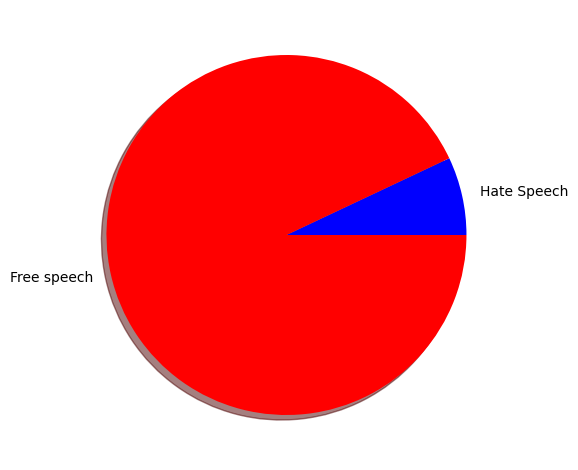

In [49]:
hate_speech = df[df['label']==1].shape[0]
free_speech = df[df['label']==0].shape[0]

speech = [hate_speech, free_speech]
label = ['Hate Speech','Free speech']

plt.pie(speech,labels=label,shadow=True,colors=['blue','red'])
plt.tight_layout()
plt.show()

## Preprocesing Operations

> <b> Tokenizing
  
>  <b> Removing stop words
  
>  <b> Lemmatization
  
>  <b> WordCloud

#### Tokenizing

In [50]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [51]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)

In [52]:
df.head()

,id,label,tweet
0,1,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,"[thanks, for, credit, i, cant, use, cause, the..."
2,3,0,"[bihday, your, majesty]"
3,4,0,"[i, love, u, take, with, u, all, the, time, in..."
4,5,0,"[factsguide, society, now]"


#### Removing Stop words

In [53]:
from nltk.corpus import stopwords

In [54]:
def remove_stopwords(text):
    text = [i for i in text if not i in stopwords.words('english')]
    return text
df['tweet'] = df['tweet'].apply(remove_stopwords)

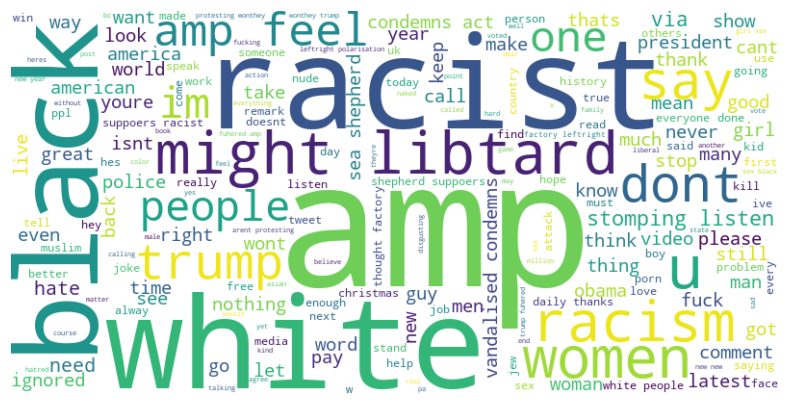

In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter rows where label is 1 and join each list of tokens back into a single string per row
joined_text = df[df['label'] == 1]['tweet'].apply(lambda x: ' '.join(x))

# Combine all the rows into a single text
all_text = ' '.join(joined_text)

# Define stop words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



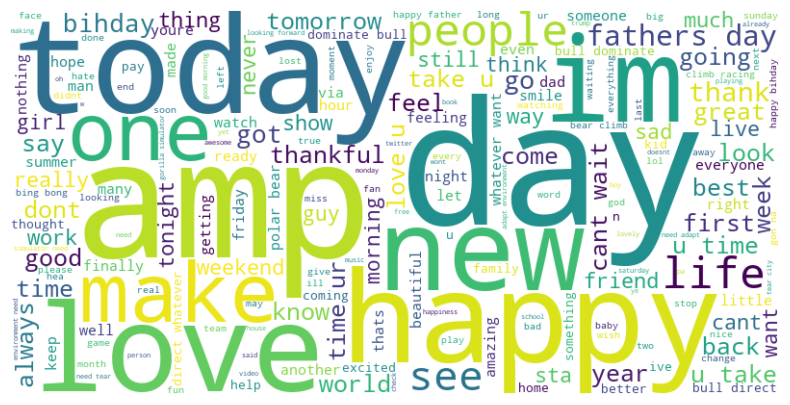

In [65]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter rows where label is 1 and join each list of tokens back into a single string per row
joined_text = df[df['label'] == 0]['tweet'].apply(lambda x: ' '.join(x))

# Combine all the rows into a single text
all_text = ' '.join(joined_text)

# Define stop words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Feature Extraction

> <b>TI-IDF Model

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer = TfidfVectorizer()

In [68]:
list_str = []
for lists in df['tweet']:
    list_str.append(' '.join(map(str, lists)))

df['tweet'] = list_str

In [69]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()
text.shape

(31962, 23900)

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday majesty
3,4,0,love u take u time ur
4,5,0,factsguide society
